In [6]:
import numpy as np

%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# 3. Multi-variable Functions and Gradient

## Function With Two Variables

$$
f(x, y) = (x-2)^2 + (y+1)^2
$$

In [29]:
def f(variables):
    return ((variables['x']-2) ** 2 + (variables['y']+1) ** 2)

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = f({'x': X, 'y': Y})

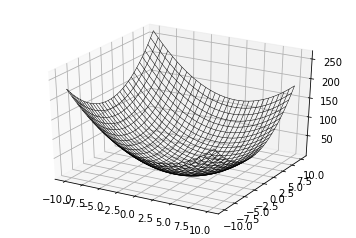

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.5)

In [31]:
def gradient(variables, variable_name):
    h = 1e-4
    input2 = variables.copy()
    input2[variable_name] += h
    
    input1 = variables.copy()
    input1[variable_name] -= h
    
#     print(input1, input2)
    
    z2 = f(input2)
    z1 = f(input1)
#     print(z1, z2)
    
    delta_z = z2 - z1
    delta_x = h * 2
    return delta_z / delta_x

In [32]:
gradient({'x': 4.5, 'y': -3.0}, 'x')

4.999999999988347

In [33]:
current_x = 4.5
current_y = -3.0

for iteration in range(1000):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    #print("iteration: {}, x: {}, y: {}, output: {}".format(iteration, current_x, current_y, function_output))
    
print("minimum x:{}, y:{}".format(current_x, current_y))

minimum x:2.000000004207419, y:-1.0000000033659349


## Function with Multiple Variables and Parameters

Let P a collection of points on 2D plane.
Find a center point $\theta_{x}$ and $\theta_{y}$ from which the sum of distance to all the points in P is minimized.

$$
D(P; \theta) = \sum_{i=0}^P \sqrt {(p_{x[i]} - \theta_{x})^2 + (p_{y[i]} - \theta_{y})^2 }
$$

$$
\underset{\theta}{\operatorname{argmax}} D(P; \theta)
$$

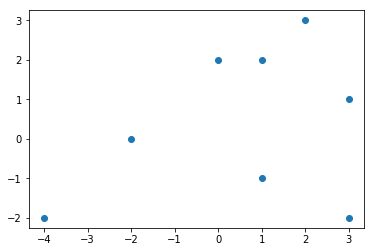

In [53]:
points = np.array([
    [1, 2],
    [-4, -2],
    [0, 2],
    [1, -1],
    [2, 3],
    [3, 1],
    [3, -2],
    [-2, 0],
])

plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

In [54]:
center = np.array([1, 1])

In [55]:
points

array([[ 1,  2],
       [-4, -2],
       [ 0,  2],
       [ 1, -1],
       [ 2,  3],
       [ 3,  1],
       [ 3, -2],
       [-2,  0]])

In [56]:
np.linalg.norm(points, axis=1)

array([ 2.23606798,  4.47213595,  2.        ,  1.41421356,  3.60555128,
        3.16227766,  3.60555128,  2.        ])

In [57]:
np.sum(np.linalg.norm(points - center, axis=1))

21.249062370350554

In [58]:
def distance(variables):
    center = np.array([variables['x'], variables['y']])
    return np.sum(np.linalg.norm(points - center, axis=1))

In [59]:
distance({'x': 0, 'y': 0})

22.495797705968823

In [60]:
distance({'x': -1, 'y': 0})

24.743996622946284

In [61]:
distance({'x': 1, 'y': 0})

21.848005547048654

In [62]:
distance({'x': 0, 'y': 1})

21.957417329238151

In [63]:
distance({'x': 0, 'y': -1})

24.761416153917779

In [64]:
def gradient_pos(variables, variable_name):
    h = 1e-4
    input2 = variables.copy()
    input2[variable_name] += h
    
    input1 = variables.copy()
    input1[variable_name] -= h
    
    z2 = distance(input2)
    z1 = distance(input1)
    
    delta_z = z2 - z1
    delta_x = h * 2
    return delta_z / delta_x

In [65]:
gradient_pos({'x': 0, 'y': 0}, 'y')

-1.3336846791567325

In [66]:
current_x = -2
current_y = -2

for iteration in range(500):
    ETA = 0.01
    current = {
        'x': current_x,
        'y': current_y
    }
    grad = {
        'x': gradient_pos(current, 'x'),
        'y': gradient_pos(current, 'y'),
    }
    function_output = distance(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
#     print("iteration: {}, x: {}, y: {}, output: {}".format(iteration, current_x, current_y, function_output))

print("Center x:{}, y:{}".format(current_x, current_y))

Center x:0.7946608780334614, y:0.9632069424817331


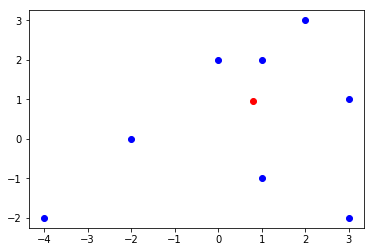

In [67]:
plt.plot(points[:, 0], points[:, 1], 'bo')
plt.plot([current_x], [current_y], 'ro')
plt.show()